# EDA - Retail 


# Author - Aniket Shelke

## Problem Statement:

1. Perform EDA 
2. Find out weak areas you can work to make more profit
3. What all business problem you can derive b EDA

In [22]:
#Importing all the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('SampleSuperstore.csv')

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.shape

(9994, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
#Dropping Irrelevant Column - Postal Code
df = df.drop(['Postal Code'],axis = 1)

In [7]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [8]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [9]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [10]:
#Checking and dropping the duplicate Values
df.duplicated().sum()
df=df.drop_duplicates()
df

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [12]:
#Checking for Unique Values in Categorical Columns
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [13]:
#Checking for Unique Values in Sub-Categorical Columns
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [14]:
#Checking no. of Unique Values in Categorical Columns
df['Category'].value_counts()

Office Supplies    5986
Furniture          2114
Technology         1844
Name: Category, dtype: int64

In [15]:
#Checking no. of Unique Values in Sub-Categorical Columns
df['Sub-Category'].value_counts()

Binders        1518
Paper          1344
Furnishings     954
Phones          888
Storage         845
Art             793
Accessories     773
Chairs          615
Appliances      466
Labels          359
Tables          319
Envelopes       254
Bookcases       226
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

## Exloratory Data Analysis

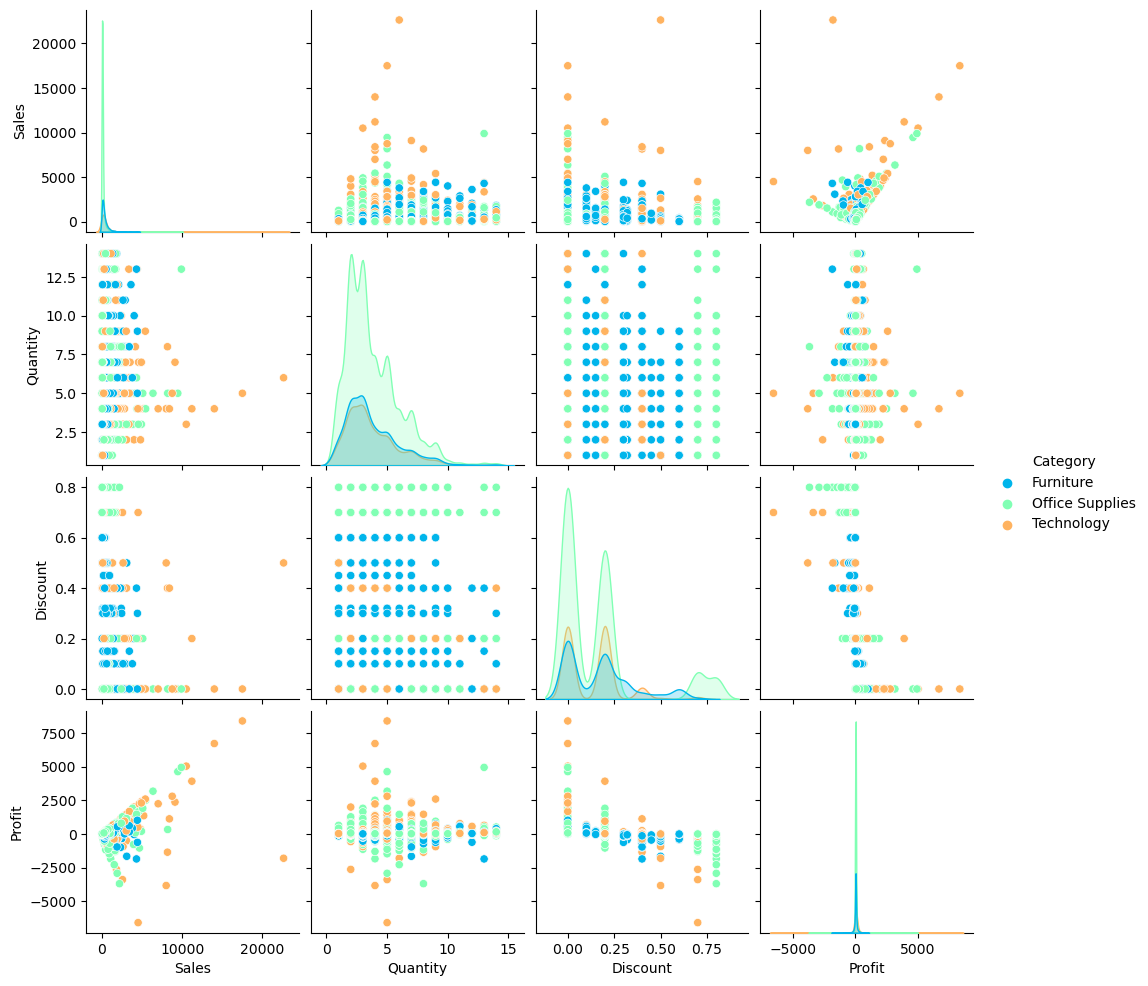

In [24]:
#Using Pairplot from seaborn based on Category and Region
sns.pairplot(df,hue = 'Category',palette = 'rainbow')

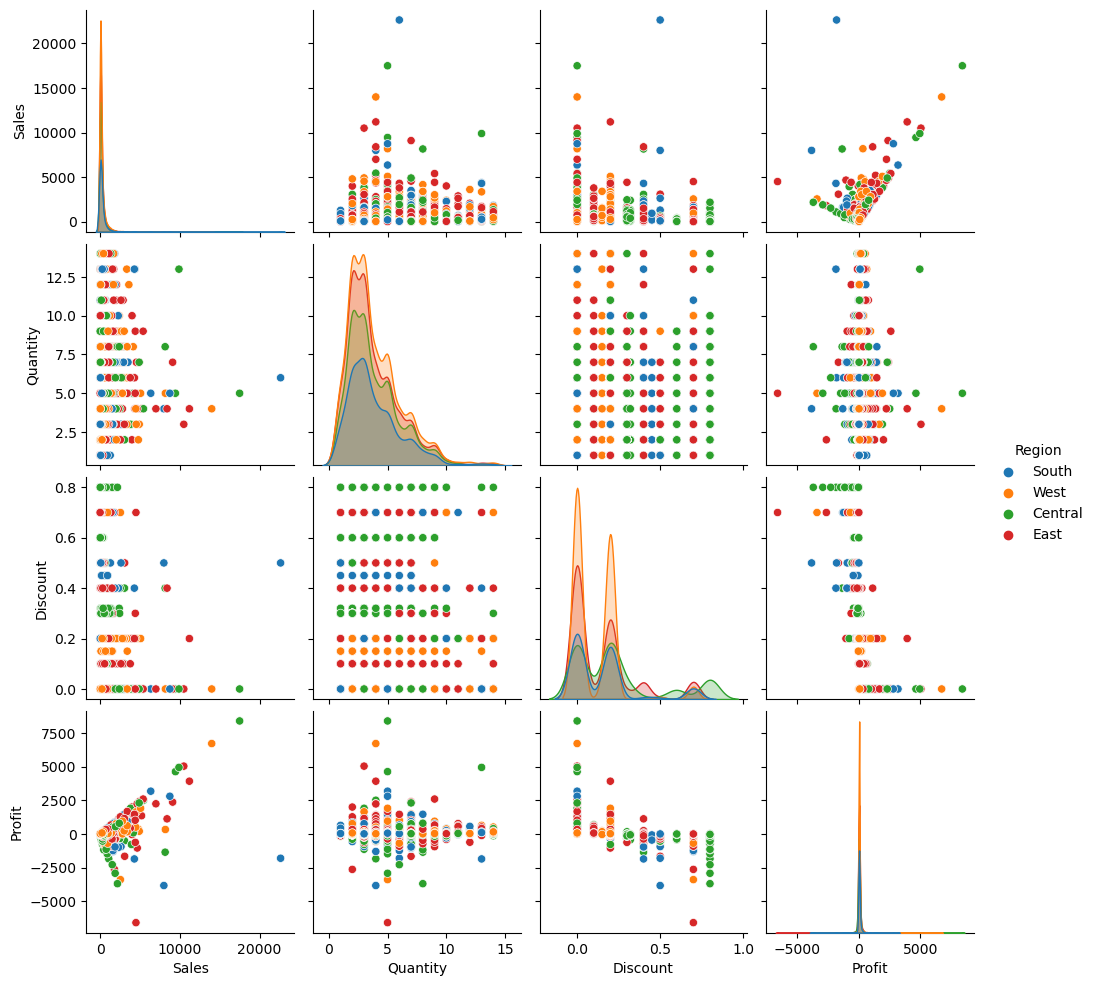

In [32]:
sns.pairplot(df,hue = 'Region')

In [19]:
#Finding corelation between attributes and visualising using heatmap
cor = df.corr()
cor

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200469,-0.028625,0.479078
Quantity,0.200469,1.000000,0.008307,0.066089
Discount,-0.028625,0.008307,1.000000,-0.219939
Profit,0.479078,0.066089,-0.219939,1.000000


<AxesSubplot:>

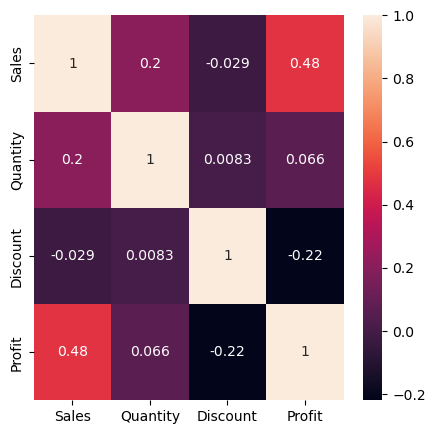

In [23]:
plt.subplots(figsize = (5,5))
sns.heatmap(cor, annot = True)

From the Heatmap we can say:
* Sales and profit are Moderately Correlated
* Profit and Discount are Negatively Correlated
* Quantity and Profit are Less Moderately Correlated

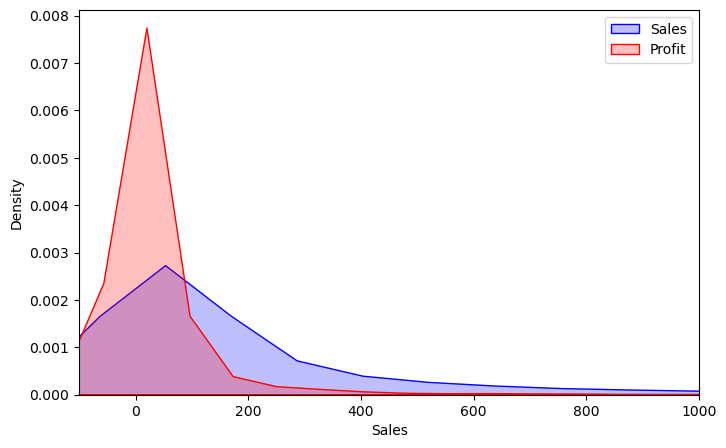

In [31]:
#Plotting the KDE Plot
plt.figure(figsize = (8,5))
sns.kdeplot(df['Sales'],color='blue',label='Sales',shade=True)
sns.kdeplot(df['Profit'],color='red',label='Profit',shade=True)
plt.xlim([-100,1000])
plt.legend()

Profit is more than sale but there are some areas where Profit could be increased

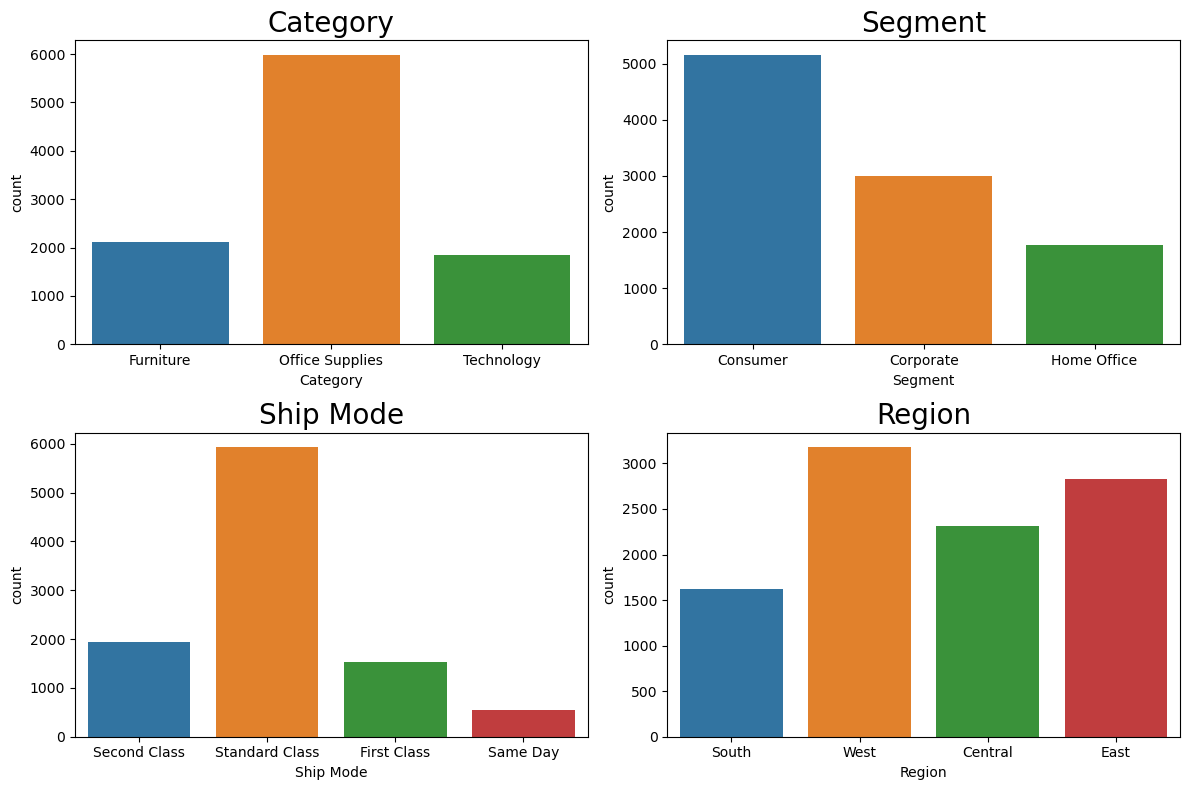

In [43]:
#Graphs for Each Column
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(12,8));
sns.countplot(df['Category'],ax=axs[0][0])
sns.countplot(df['Segment'],ax=axs[0][1])
sns.countplot(df['Ship Mode'],ax=axs[1][0])
sns.countplot(df['Region'],ax=axs[1][1])
axs[0][0].set_title('Category',fontsize=20)
axs[0][1].set_title('Segment',fontsize=20)
axs[1][0].set_title('Ship Mode',fontsize=20)
axs[1][1].set_title('Region',fontsize=20)
plt.tight_layout()

Text(0.5, 1.0, 'Sub-Category')

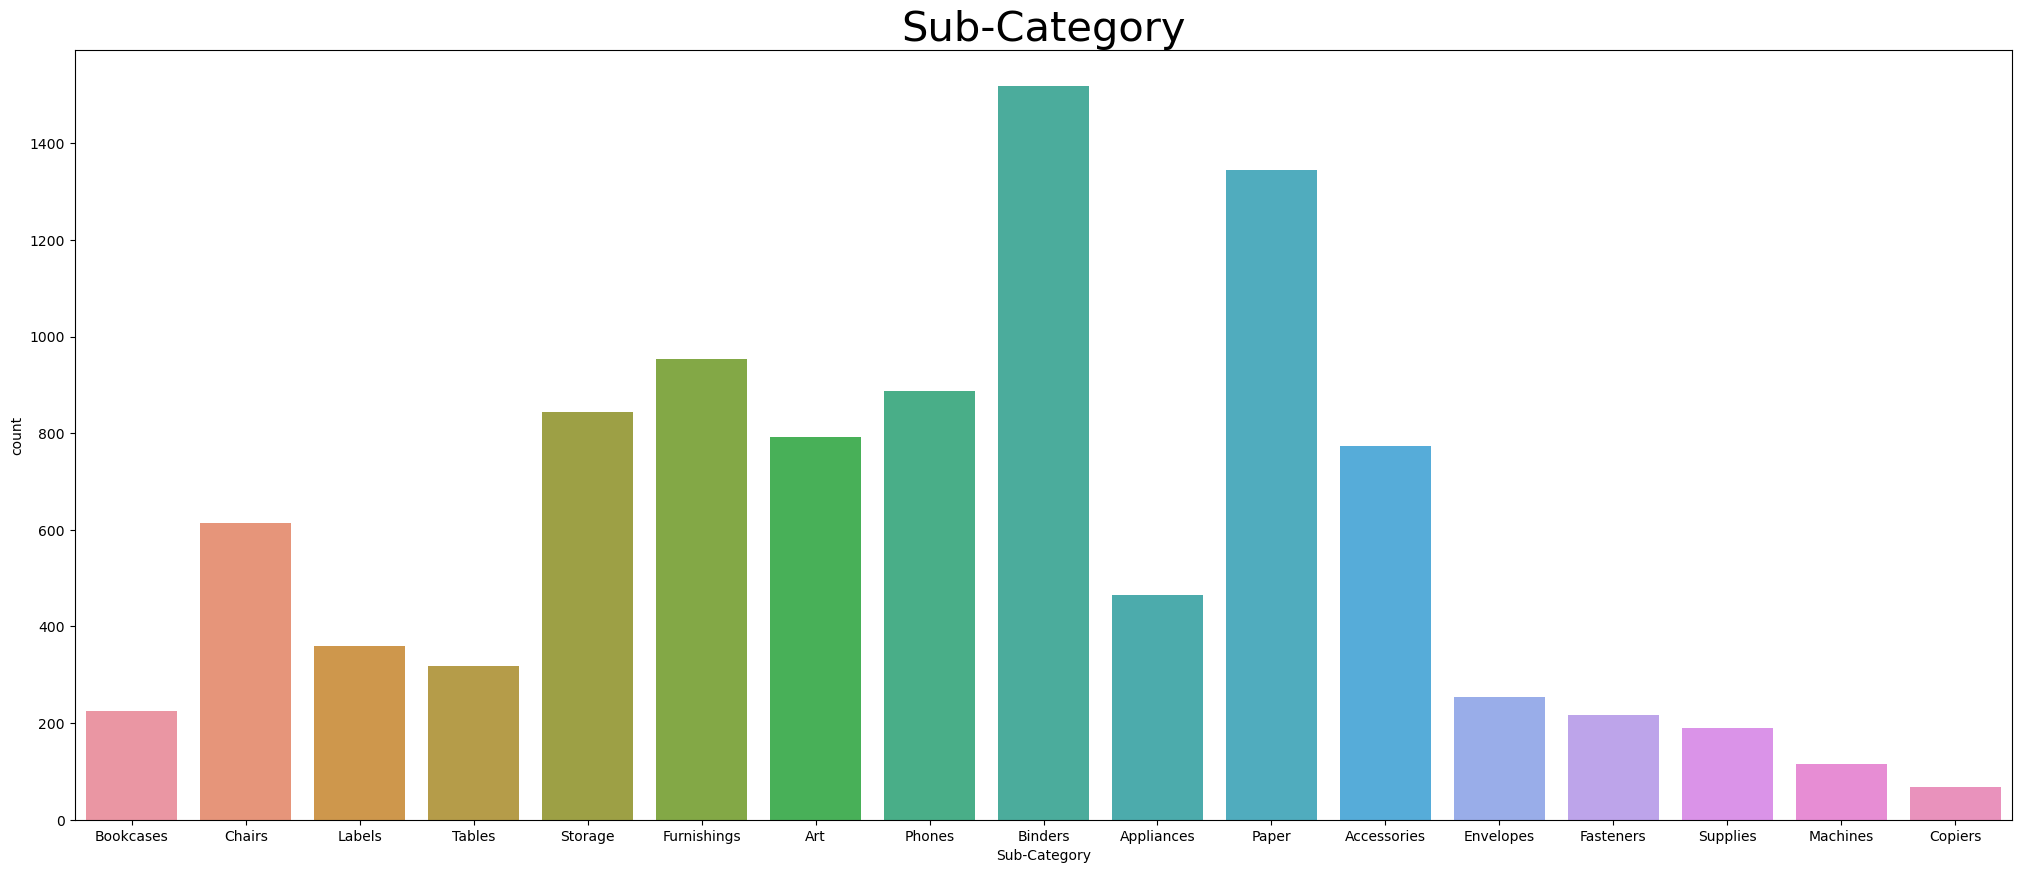

In [45]:
plt.figure(figsize=(25,10))
sns.countplot(df['Sub-Category'])
plt.title('Sub-Category',fontsize=30)

Text(0.5, 1.0, 'Quantity')

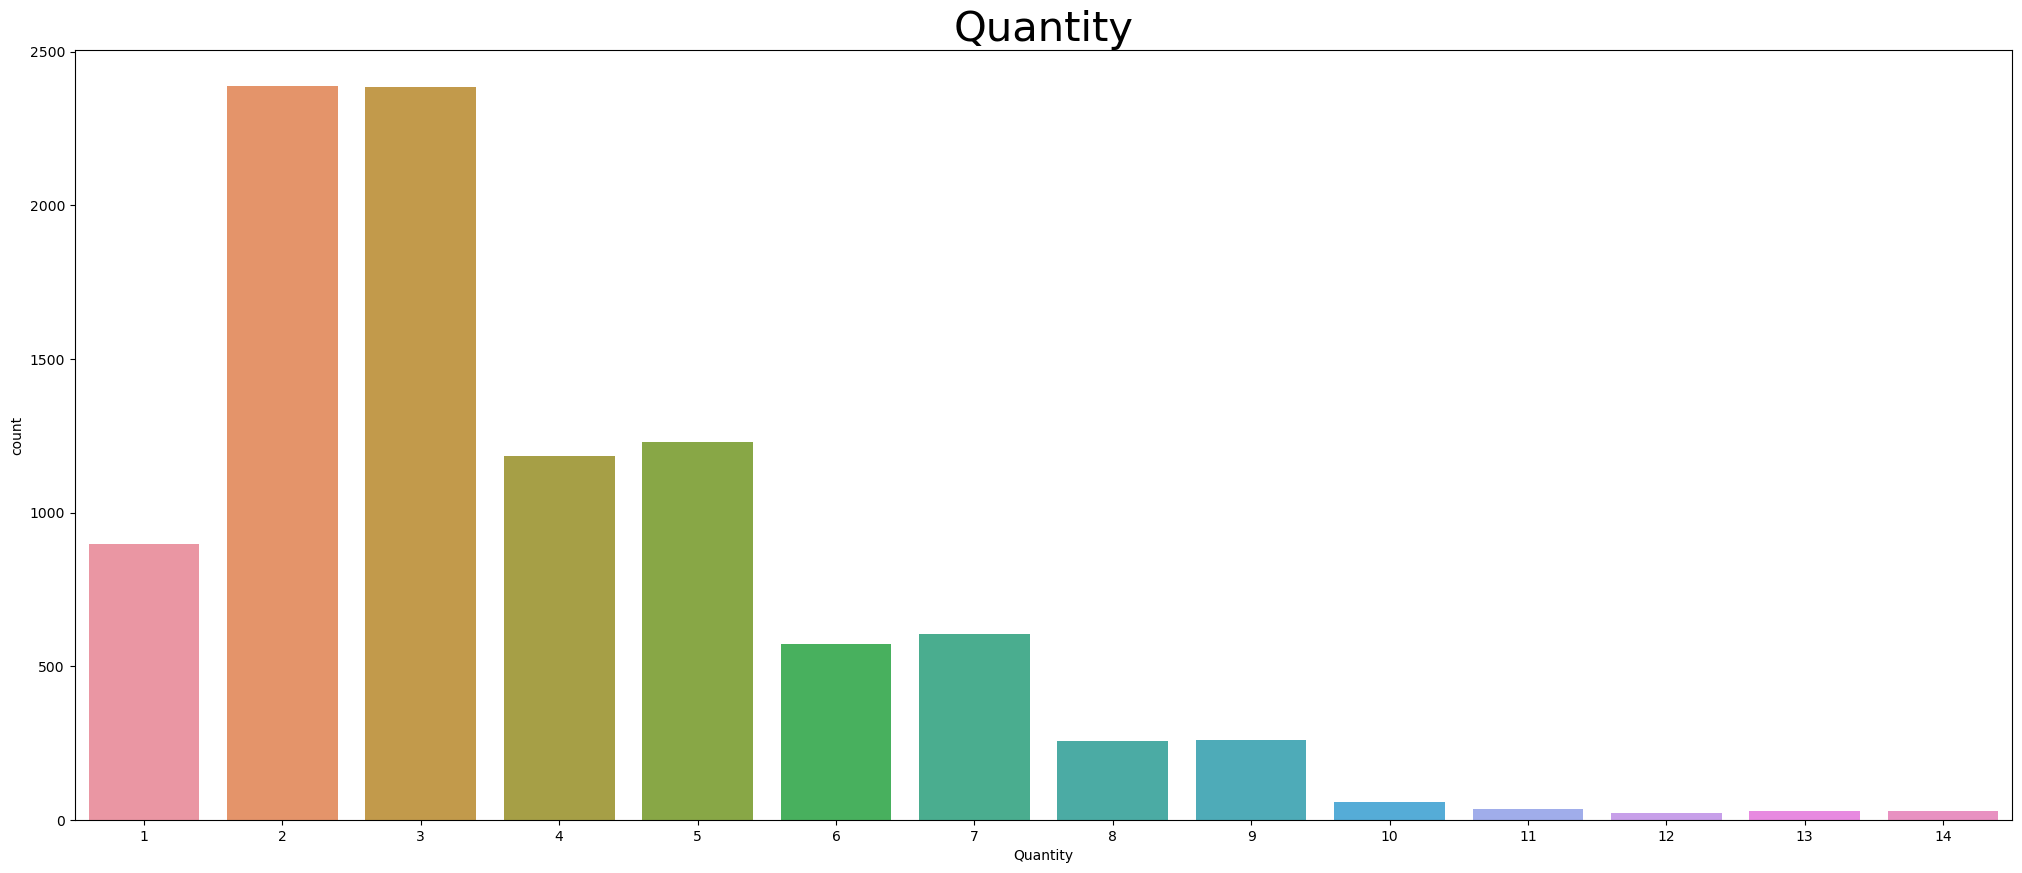

In [47]:
plt.figure(figsize=(25,10))
sns.countplot(df['Quantity'])
plt.title('Quantity',fontsize=30)

Text(0.5, 1.0, 'Discount')

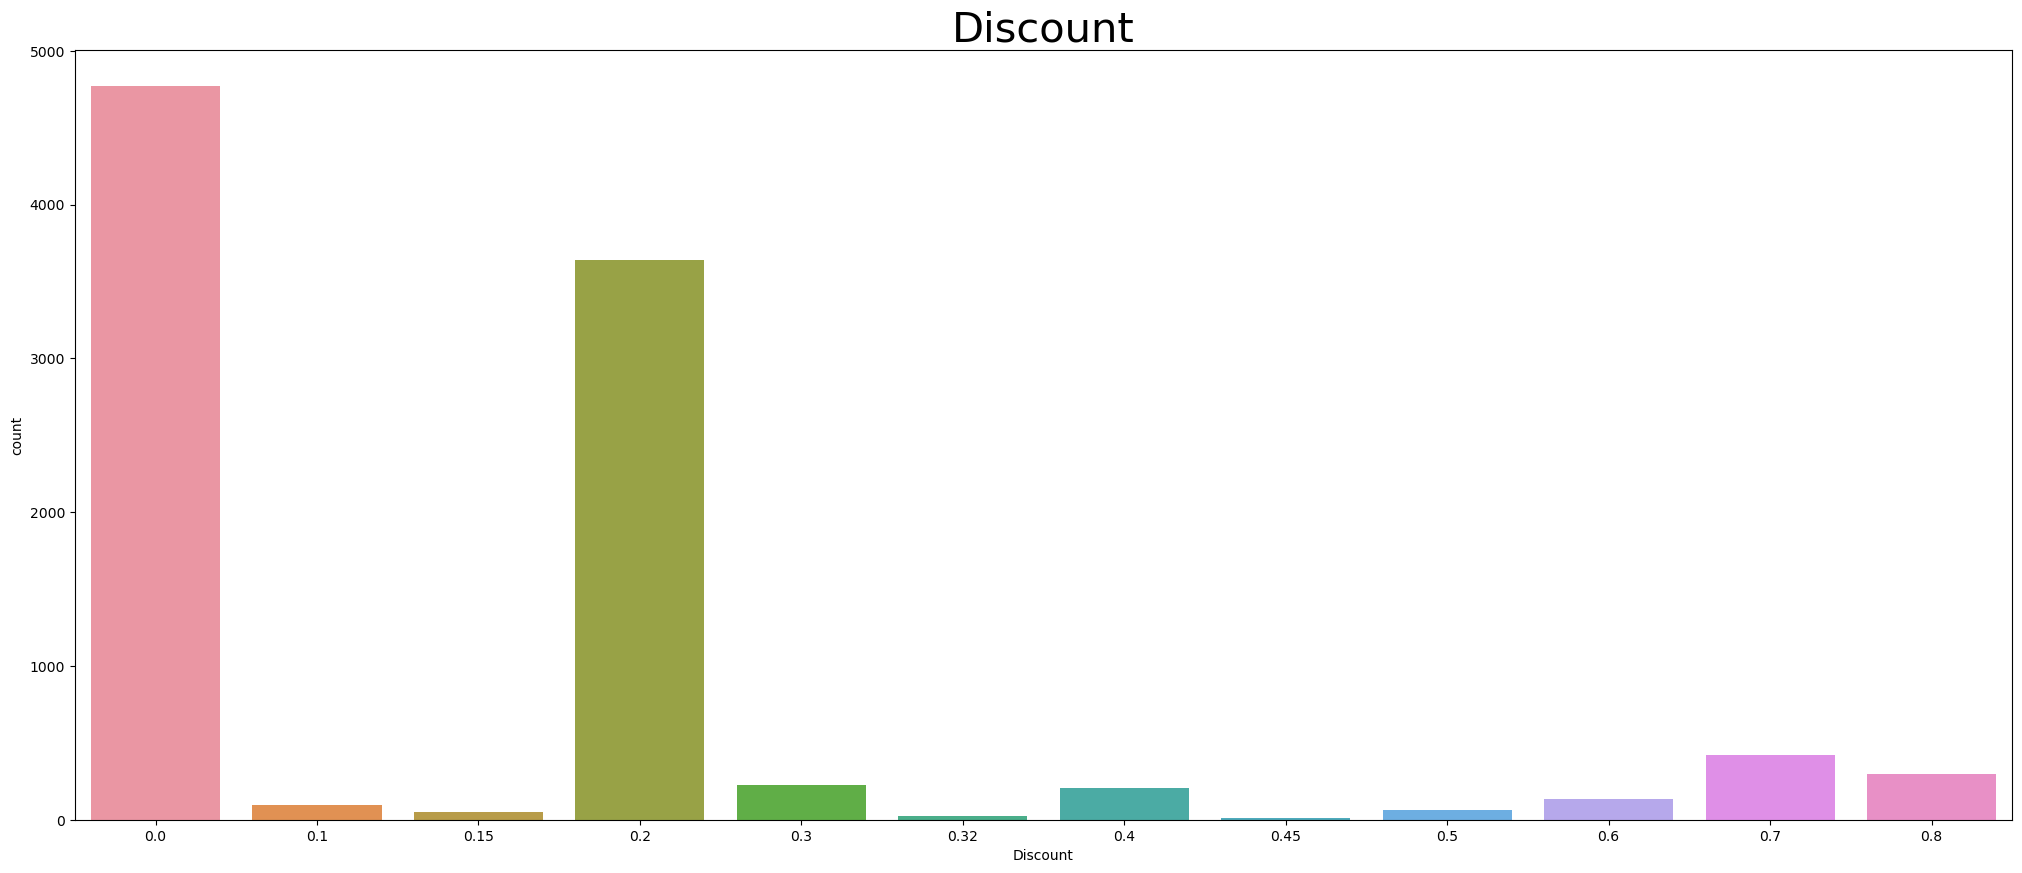

In [48]:
plt.figure(figsize=(25,10))
sns.countplot(df['Discount'])
plt.title('Discount',fontsize=30)

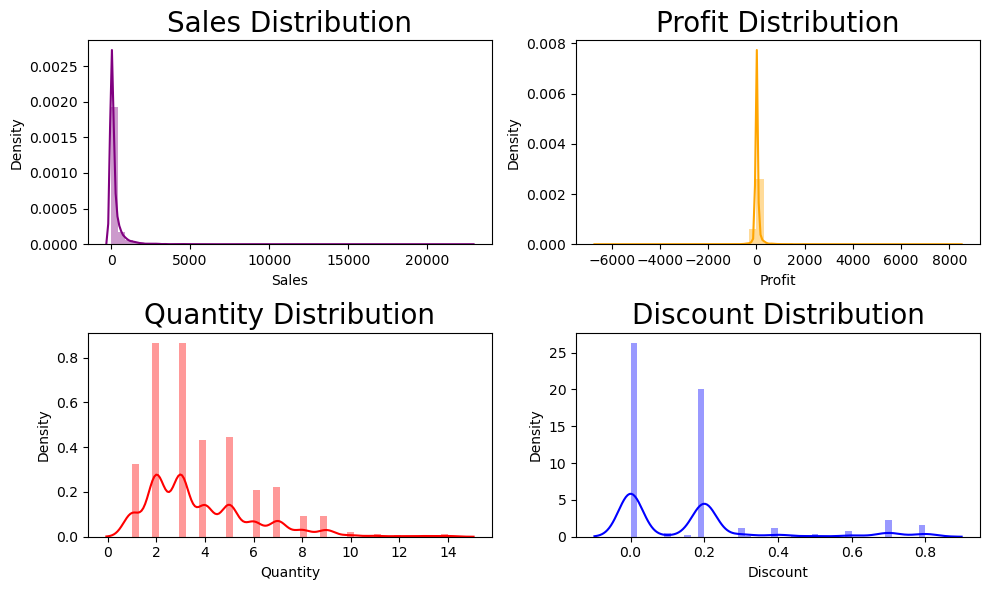

In [61]:
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(10,6));
sns.distplot(df['Sales'],color='purple',ax=axs[0][0])
sns.distplot(df['Profit'],color='orange',ax=axs[0][1])
sns.distplot(df['Quantity'],color='red',ax=axs[1][0])
sns.distplot(df['Discount'],color='blue',ax=axs[1][1])
axs[0][0].set_title('Sales Distribution',fontsize=20)
axs[0][1].set_title('Profit Distribution',fontsize=20)
axs[1][0].set_title('Quantity Distribution',fontsize=20)
axs[1][1].set_title('Discount Distribution',fontsize=20)
plt.tight_layout()

In [62]:
df['Country'].value_counts()

United States    9944
Name: Country, dtype: int64

In [63]:
df1 = df['State'].value_counts()
df1.head()

California      1980
New York        1119
Texas            980
Pennsylvania     581
Washington       502
Name: State, dtype: int64

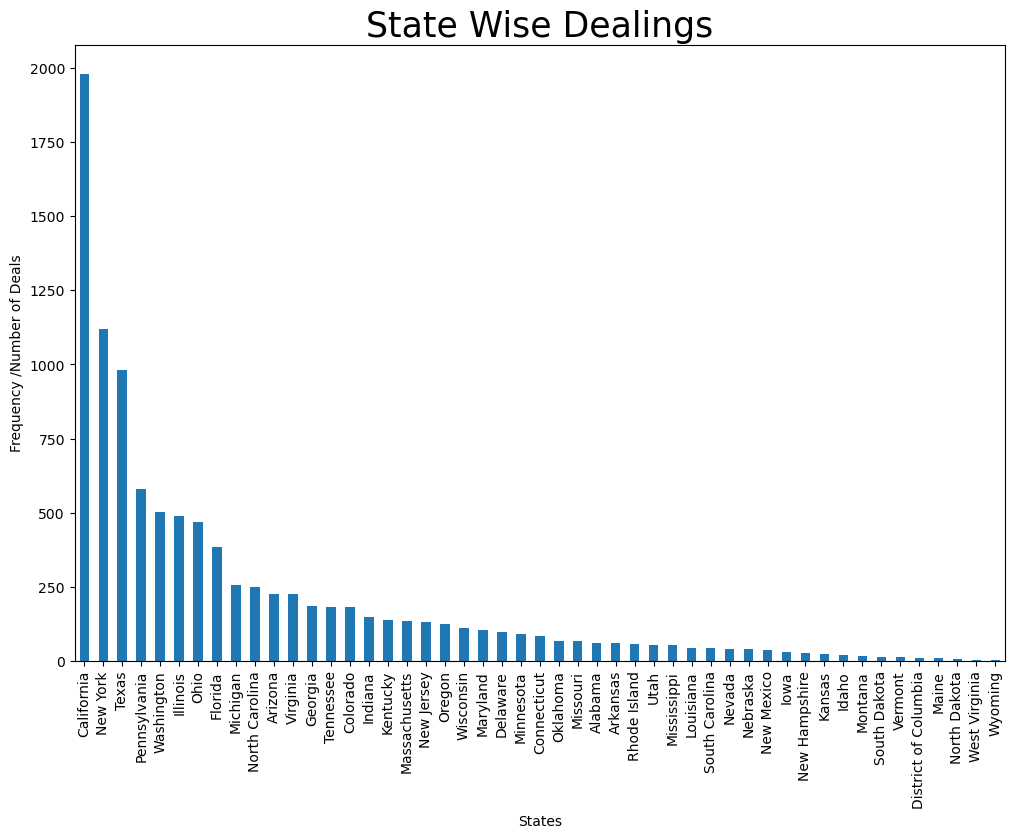

In [65]:
df1.plot(kind='bar',figsize=(12,8))
plt.ylabel('Frequency /Number of Deals')
plt.xlabel('States')
plt.title('State Wise Dealings', fontsize = 25)
plt.show()

The top 5 states in terms of Dealing are:
* California
* New York
* Texas
* Pennslyvania
* Washington

In [68]:
df['State'].value_counts().mean()

202.9387755102041

Average Number of Dealing per state is 203.


In [90]:
df2 = df['City'].value_counts()
df2.head(10)

New York City    906
Los Angeles      734
Philadelphia     531
San Francisco    503
Seattle          424
Houston          373
Chicago          312
Columbus         221
San Diego        169
Springfield      163
Name: City, dtype: int64

In [93]:
df2 = df2.iloc[:15]
df2

New York City    906
Los Angeles      734
Philadelphia     531
San Francisco    503
Seattle          424
Houston          373
Chicago          312
Columbus         221
San Diego        169
Springfield      163
Dallas           156
Jacksonville     125
Detroit          114
Newark            95
Richmond          90
Name: City, dtype: int64

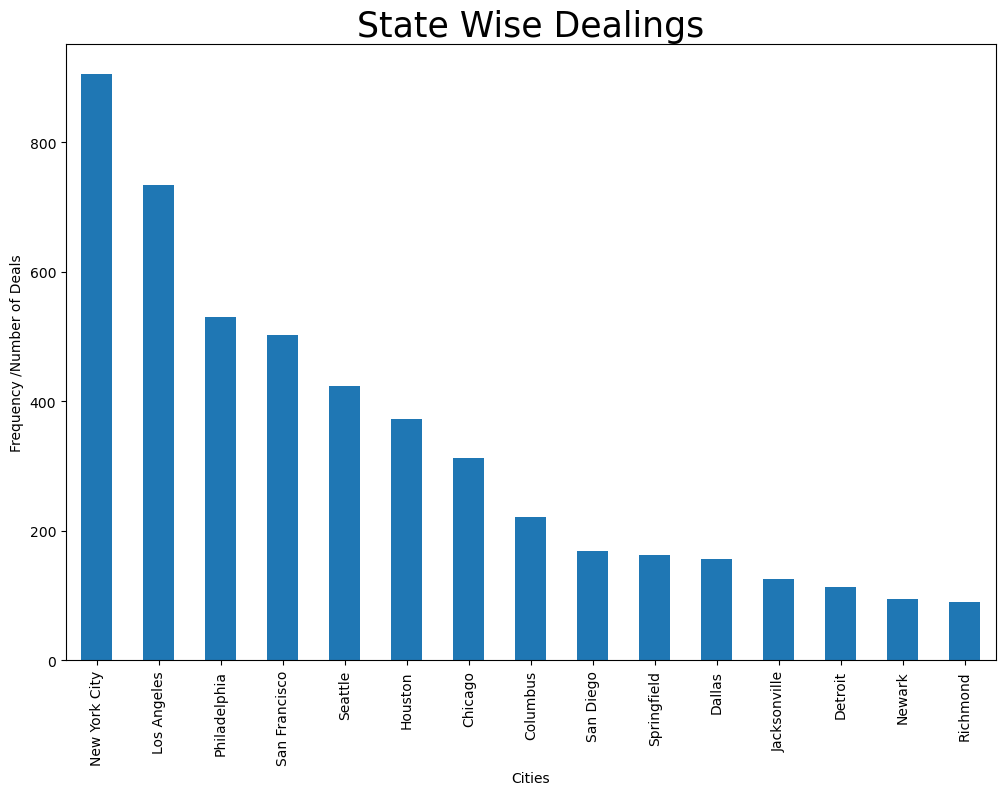

In [94]:
df2.plot(kind='bar',figsize=(12,8))
plt.ylabel('Frequency /Number of Deals')
plt.xlabel('Cities')
plt.title('City Wise Dealings', fontsize = 25)
plt.show()

Top 3 Cities where dealings are highest are:
* New York City
* Los Angeles
* Philadelphia

In [96]:
df['City'].value_counts().mean()

18.726930320150657

Average number of deal per city is 19

### Segment Wise Analysis of Profit, Discount and Sale

In [98]:
df['Segment'].value_counts()

Consumer       5160
Corporate      3008
Home Office    1776
Name: Segment, dtype: int64

In [105]:
df_seg = df.groupby(['Segment'])[['Sales','Discount','Profit']].mean()
df_seg

,Sales,Discount,Profit
Segment,,,
Consumer,224.693317,0.158442,25.957272
Corporate,234.697538,0.158394,30.555572
Home Office,241.673237,0.147314,33.922790


Text(0.5, 1.0, 'Segment wise analysis of Sale, Discount and Profit')

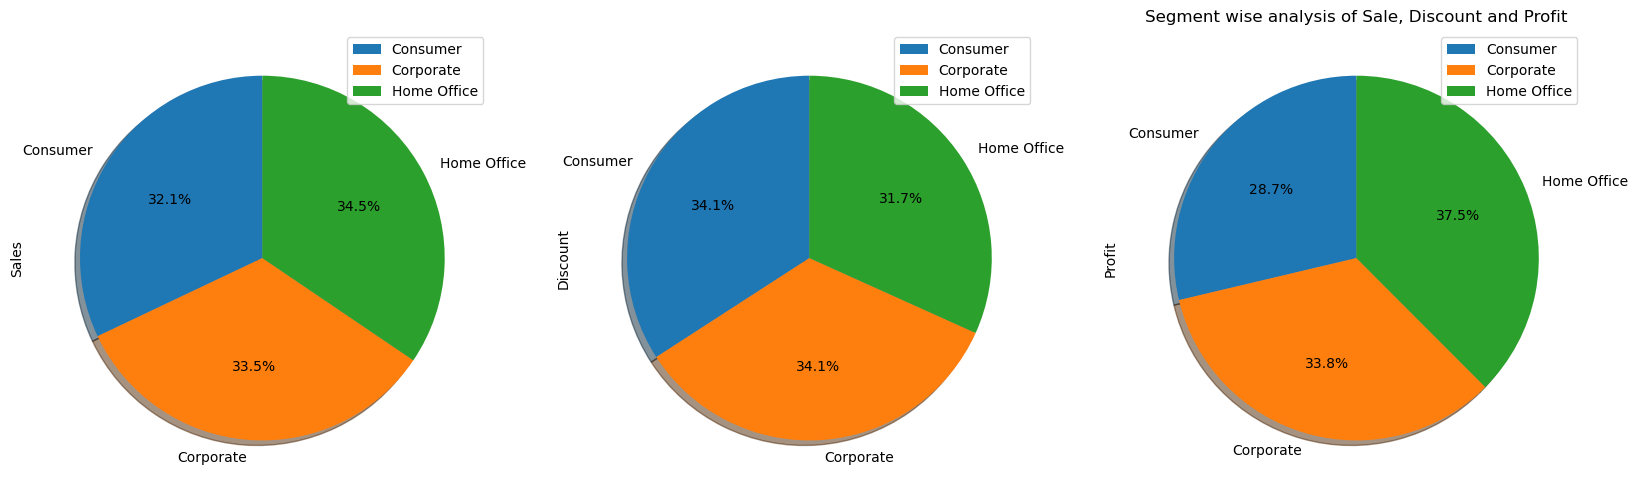

In [110]:
df_seg.plot.pie(subplots= True ,autopct = '%1.1f%%',figsize=(20,22),
           startangle = 90, shadow = True,labels = df_seg.index)
plt.title('Segment wise analysis of Sale, Discount and Profit')

Sales:
* Consumer: 32%
* Corporate: 33.5%
* Home Office: 34.5%

Discount:
* Consumer: 34%
* Corporate: 34%
* Home Office: 32%

Profit:
* Consumer: 28.7%
* Corporate: 33.8%
* Home Office: 37.5%

In [111]:
df['State'].value_counts().head(15)

California        1980
New York          1119
Texas              980
Pennsylvania       581
Washington         502
Illinois           490
Ohio               468
Florida            383
Michigan           254
North Carolina     249
Arizona            224
Virginia           224
Georgia            184
Tennessee          183
Colorado           182
Name: State, dtype: int64

In [113]:
df_state = df.groupby(['State'])[['Sales','Discount','Profit']].mean()
df_state.head(15)

,Sales,Discount,Profit
State,,,
Alabama,319.846557,0.000000,94.865989
Arizona,157.508933,0.303571,-15.303235
Arkansas,194.635500,0.000000,66.811452
California,230.621176,0.073157,38.492914
Colorado,176.418231,0.316484,-35.867351
Connecticut,163.223866,0.007317,42.823071
Delaware,285.948635,0.006250,103.930988
District of Columbia,286.502000,0.000000,105.958930
Florida,233.612815,0.299347,-8.875461


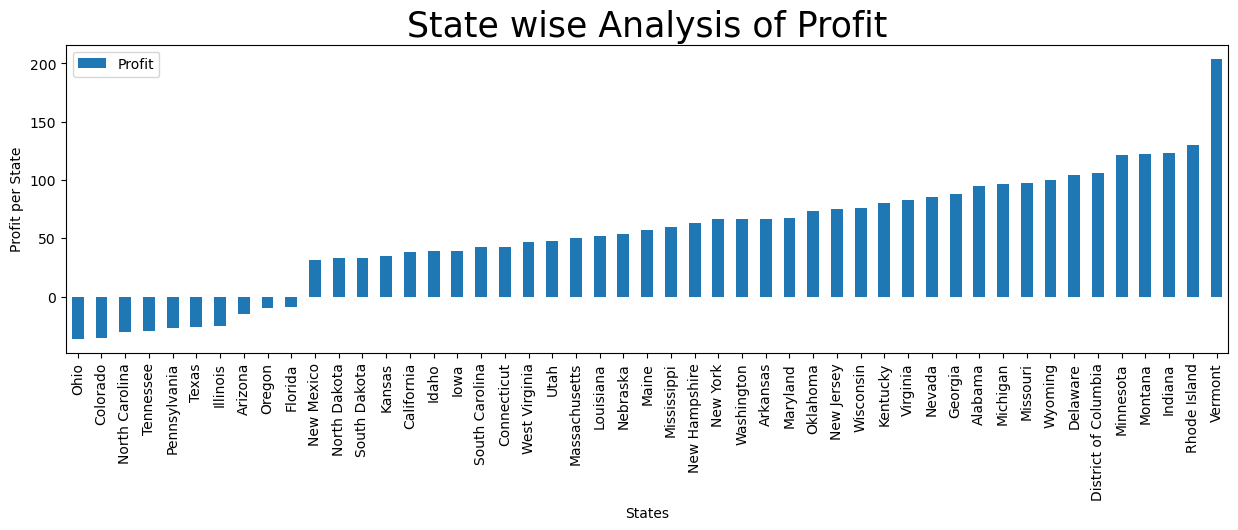

In [116]:
df_state1 = df_state.sort_values('Profit')
df_state1[['Profit']].plot(kind='bar',figsize=(15,4))
plt.xlabel('States')
plt.ylabel('Profit per State')
plt.title('State wise Analysis of Profit',fontsize = 25)
plt.show()

* State with the highest Profit is : Vermont
* State with the lowest Profit is : Ohio

Text(0.5, 1.0, 'State wise analysis of Sale')

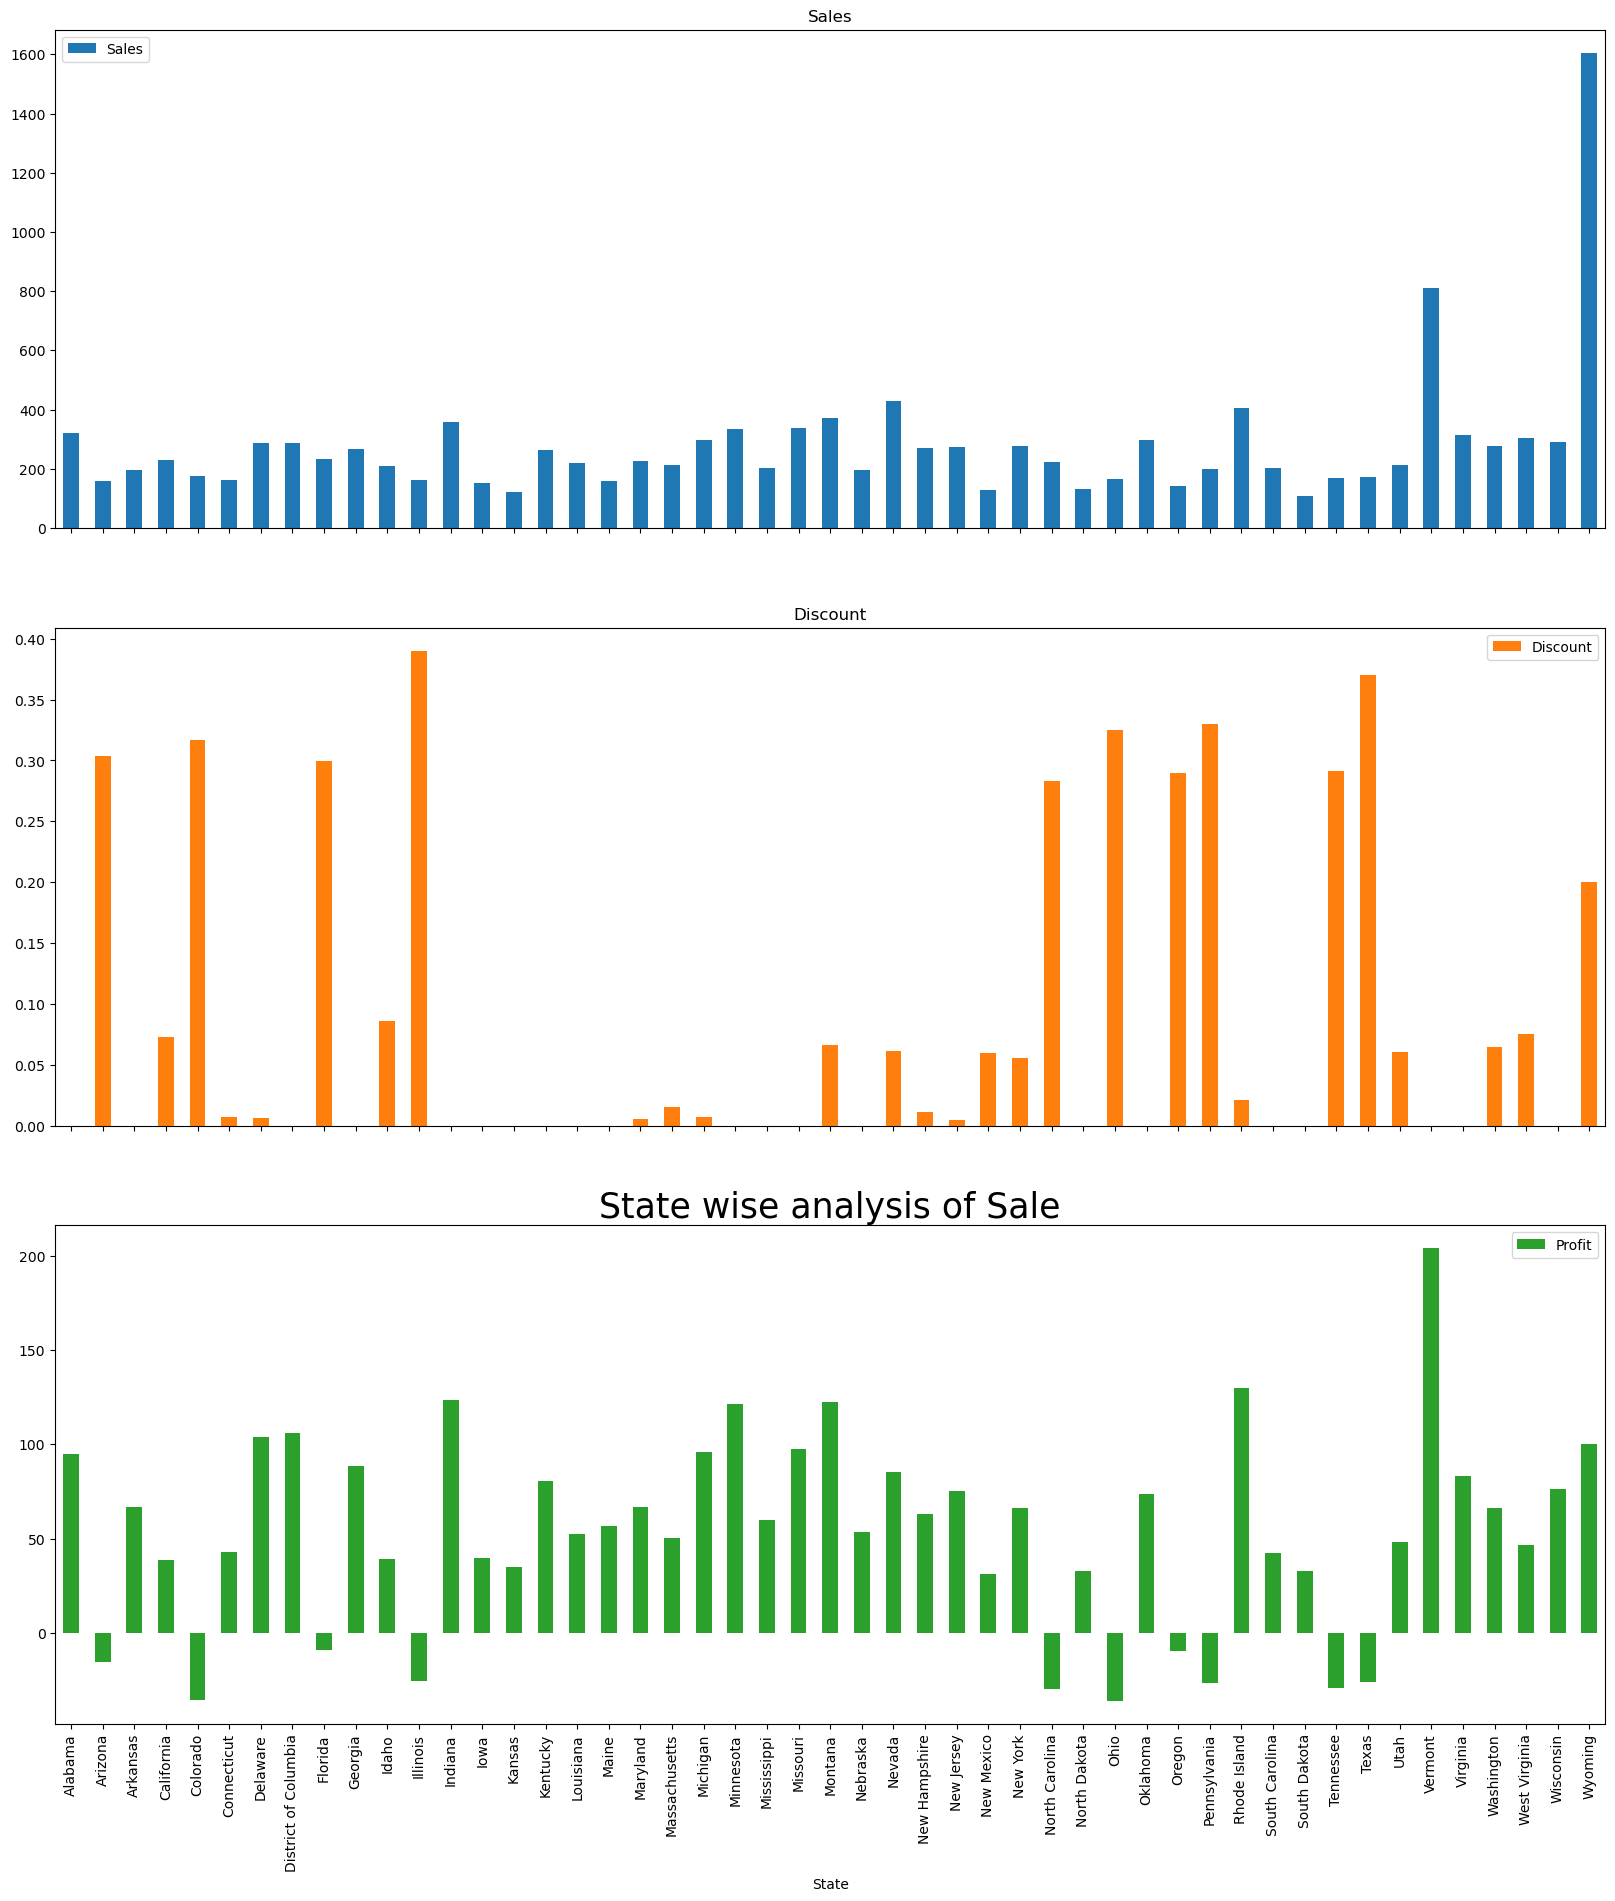

In [128]:
df_state.plot(kind='bar',subplots= True,figsize=(20,22))
plt.title('State wise analysis of Sale',fontsize=25)

* Highest Amount of Sales - Wyoming
* Highest Discount - illinois
* Highest Profit - Vermont

In [132]:
df_city = df.groupby(['City'])[['Sales','Discount','Profit']].mean()
df_city = df_city.sort_values('Profit')
df_city.head(15)
df_city = df_city.iloc[:15]

Text(0.5, 1.0, 'City wise analysis of Sale')

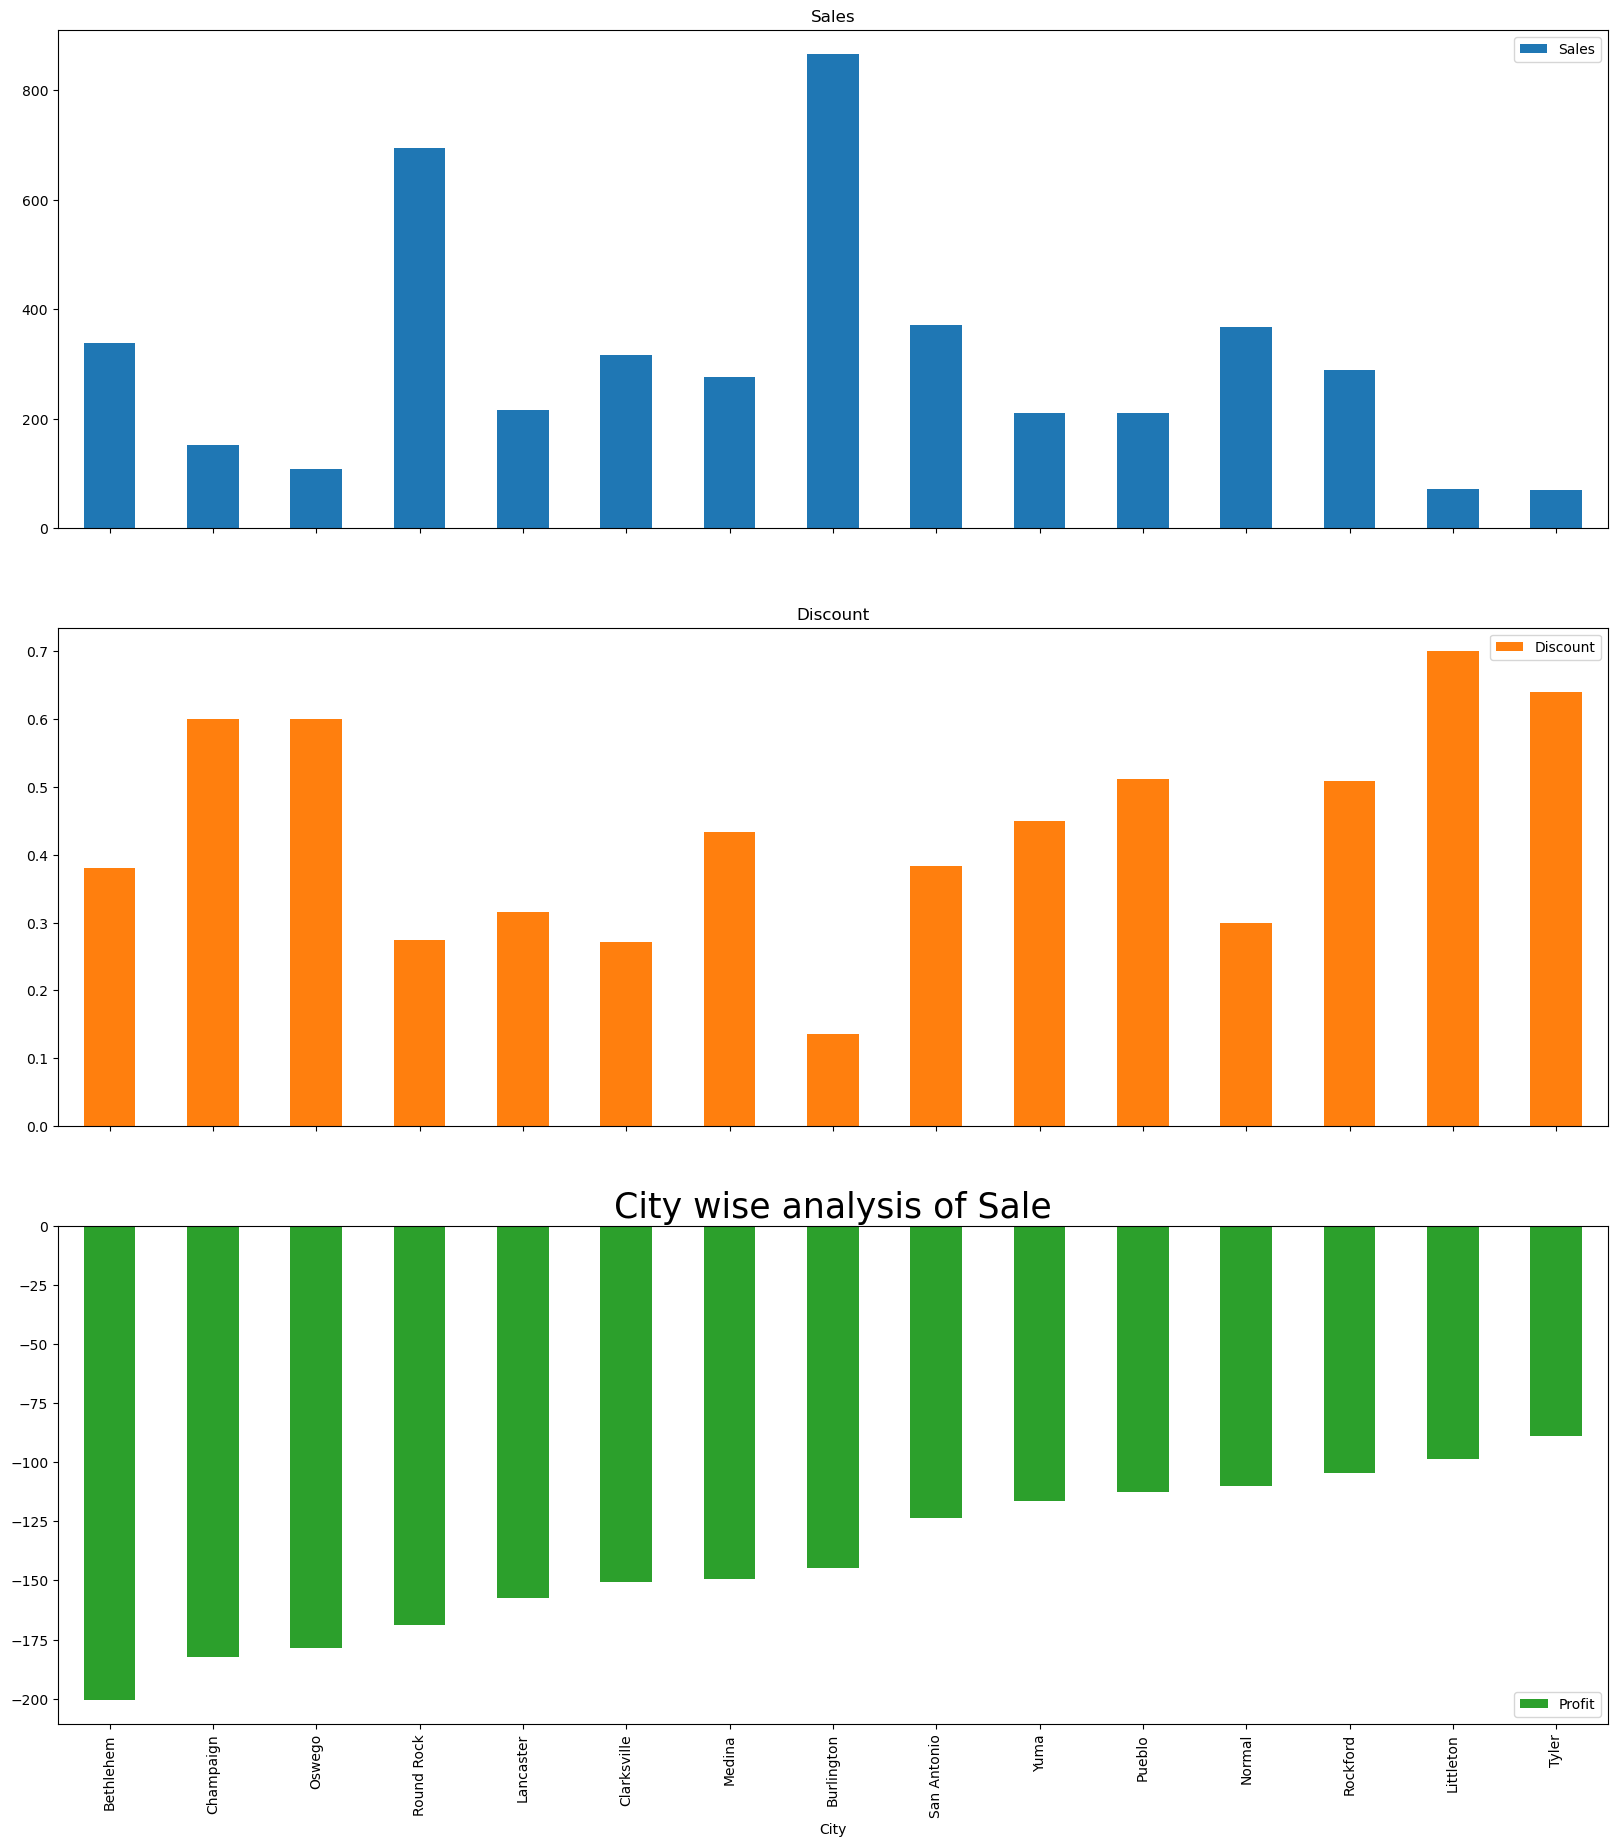

In [133]:
df_city.plot(kind='bar',subplots= True,figsize=(20,22))
plt.title('City wise analysis of Sale',fontsize=25)

In [135]:
df_quantity = df.groupby(['Quantity'])[['Sales','Discount','Profit']].mean()
df_quantity.head()

,Sales,Discount,Profit
Quantity,,,
1,59.319080,0.153300,8.274413
2,120.757848,0.155203,16.103420
3,176.286717,0.153319,23.831059
4,273.205576,0.158302,37.278597
5,338.453092,0.157402,40.312558


Text(0.5, 1.0, 'City wise analysis of Sale')

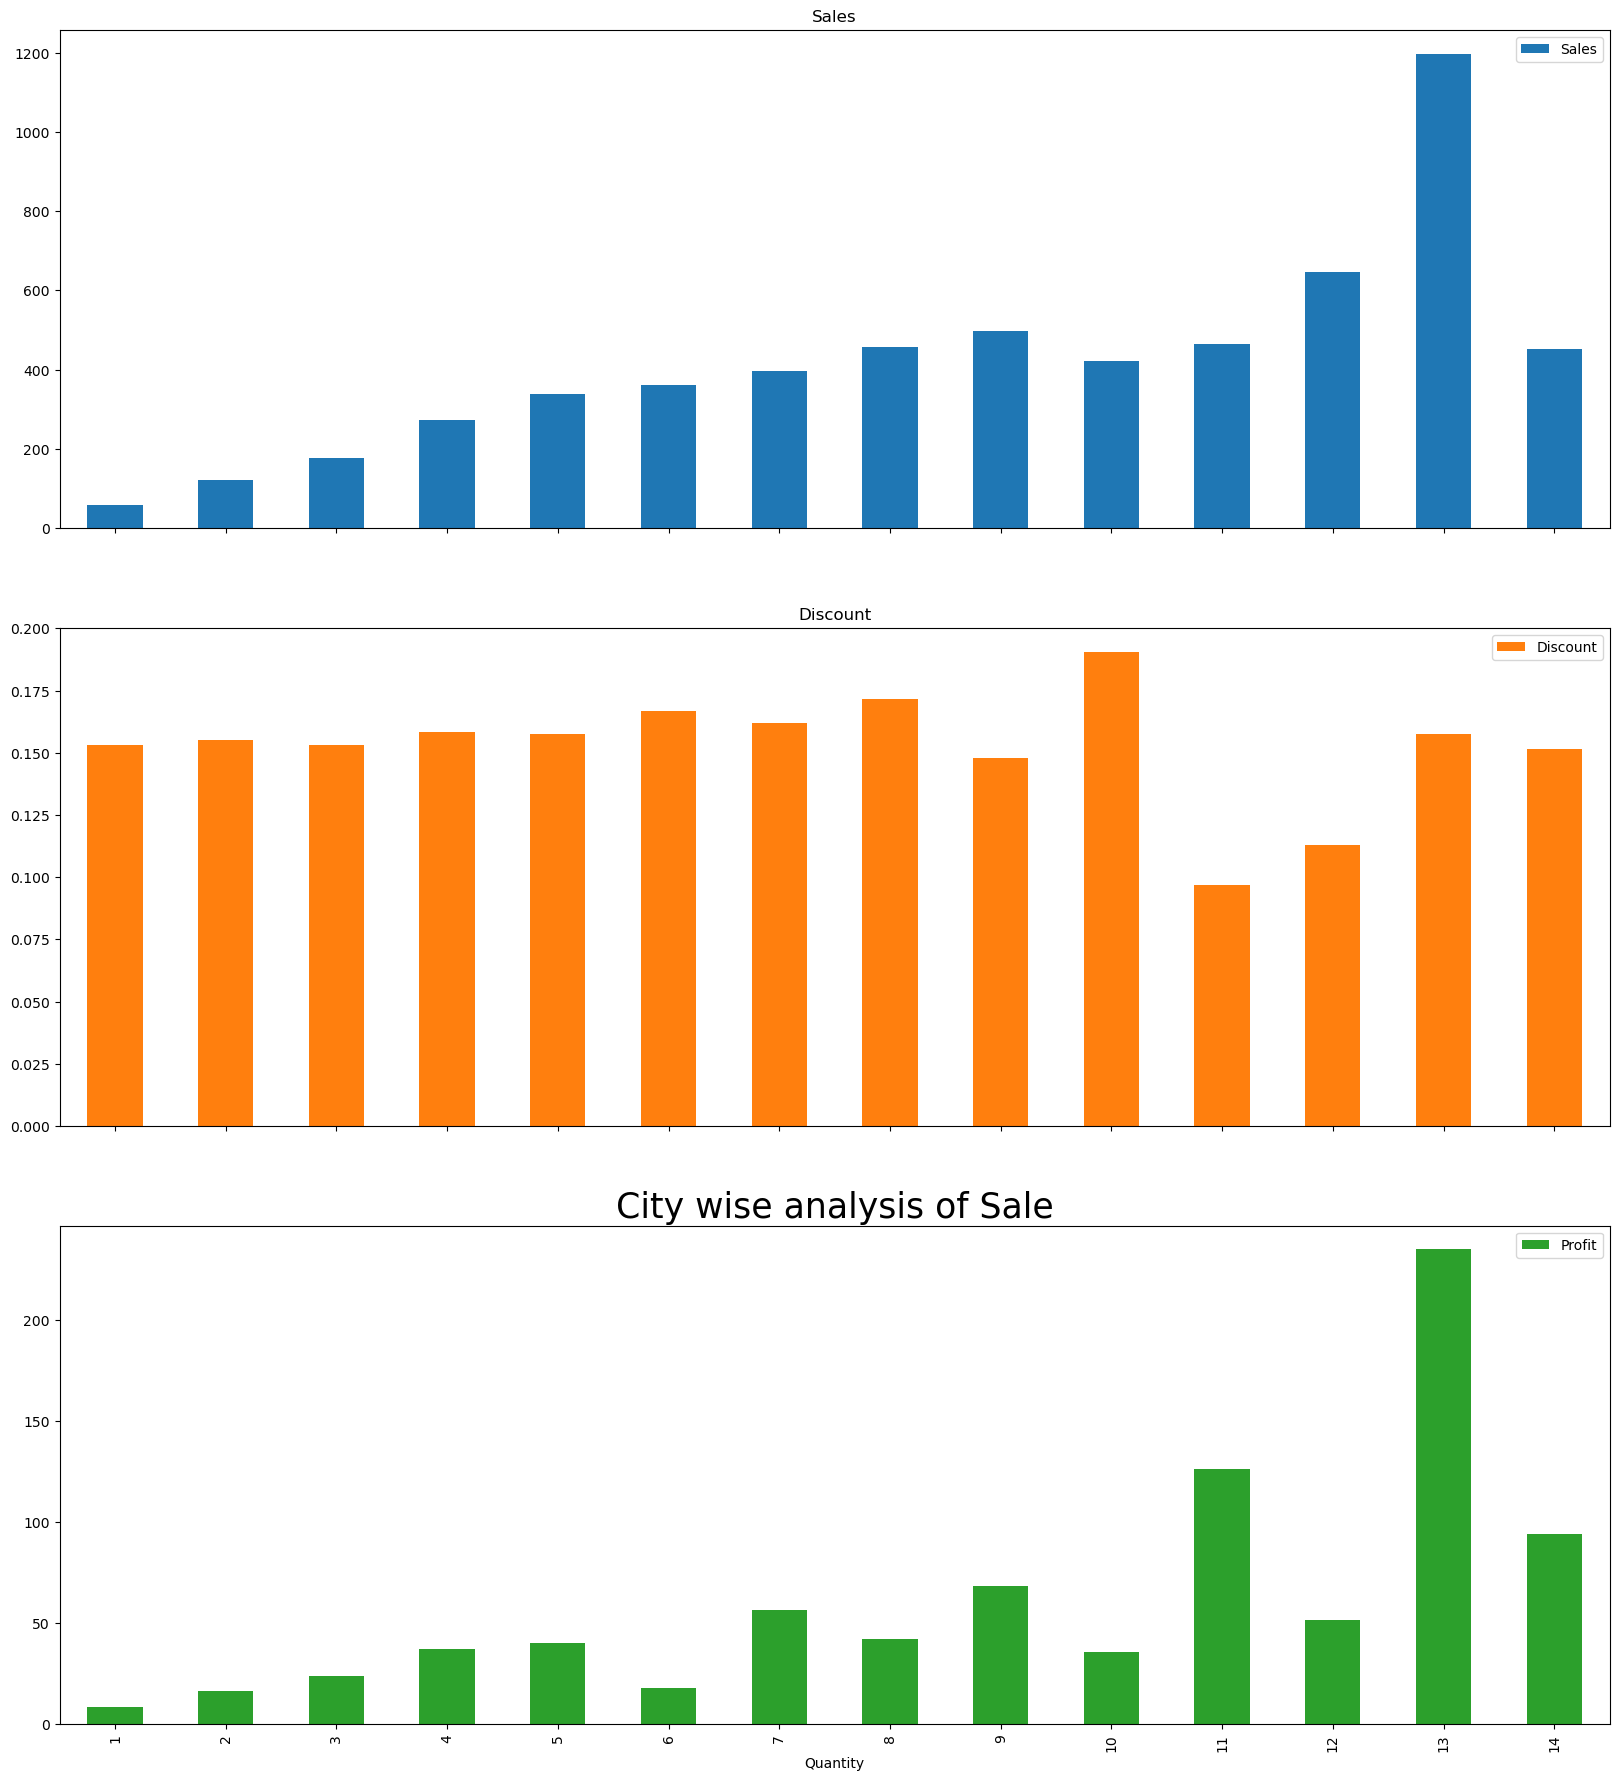

In [137]:
df_quantity.plot(kind='bar',subplots= True,figsize=(20,22))
plt.title('City wise analysis of Sale',fontsize=25)

  13 Number of Quantity is High for Sales and Profit
    

In [138]:
df_Category = df.groupby(['Category'])[['Sales','Discount','Profit']].mean()
df_Category.head()

,Sales,Discount,Profit
Category,,,
Furniture,350.316304,0.174191,8.744061
Office Supplies,119.989320,0.157601,20.413644
Technology,453.240044,0.132321,78.859295


Text(0.5, 1.0, 'City wise analysis of Sale')

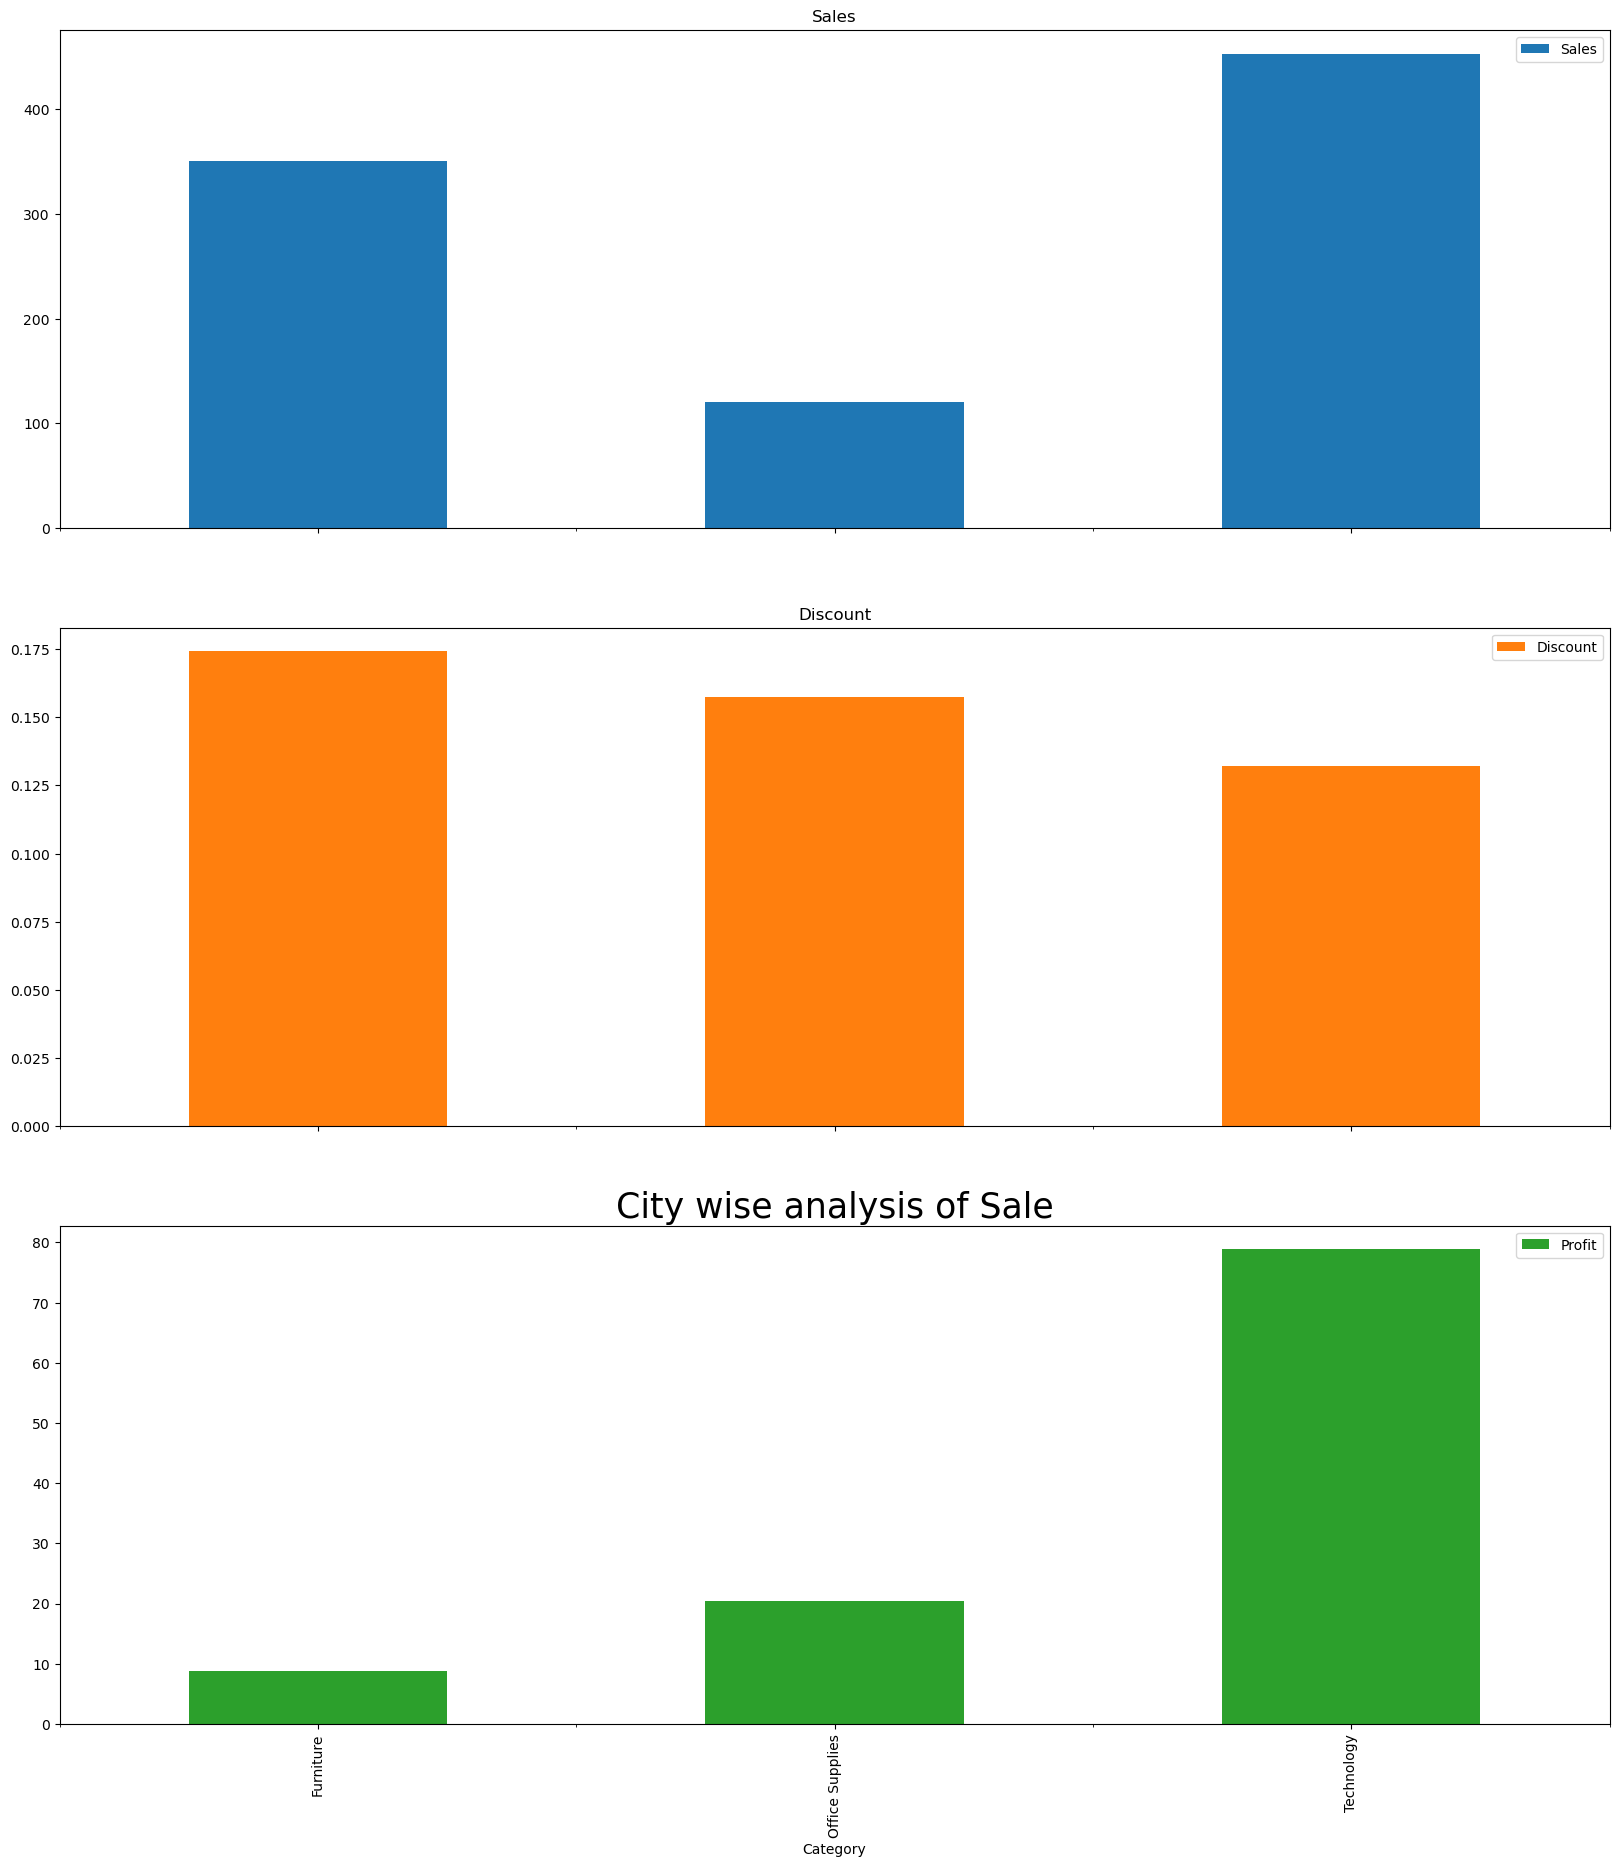

In [139]:
df_Category.plot(kind='bar',subplots= True,figsize=(20,22))
plt.title('City wise analysis of Sale',fontsize=25)

* Maximum Sales and Profit obtain in Technology
* Minimum Profit Obtained in Furniture

In [140]:
df_SCategory = df.groupby(['Sub-Category'])[['Sales','Discount','Profit']].mean()
df_SCategory.head()

,Sales,Discount,Profit
Sub-Category,,,
Accessories,216.433767,0.078396,54.231443
Appliances,230.755710,0.166524,38.922758
Art,34.130810,0.075158,8.211650
Binders,133.945230,0.372069,19.898063
Bookcases,505.163404,0.211460,-15.038735


Text(0.5, 1.0, 'City wise analysis of Sale')

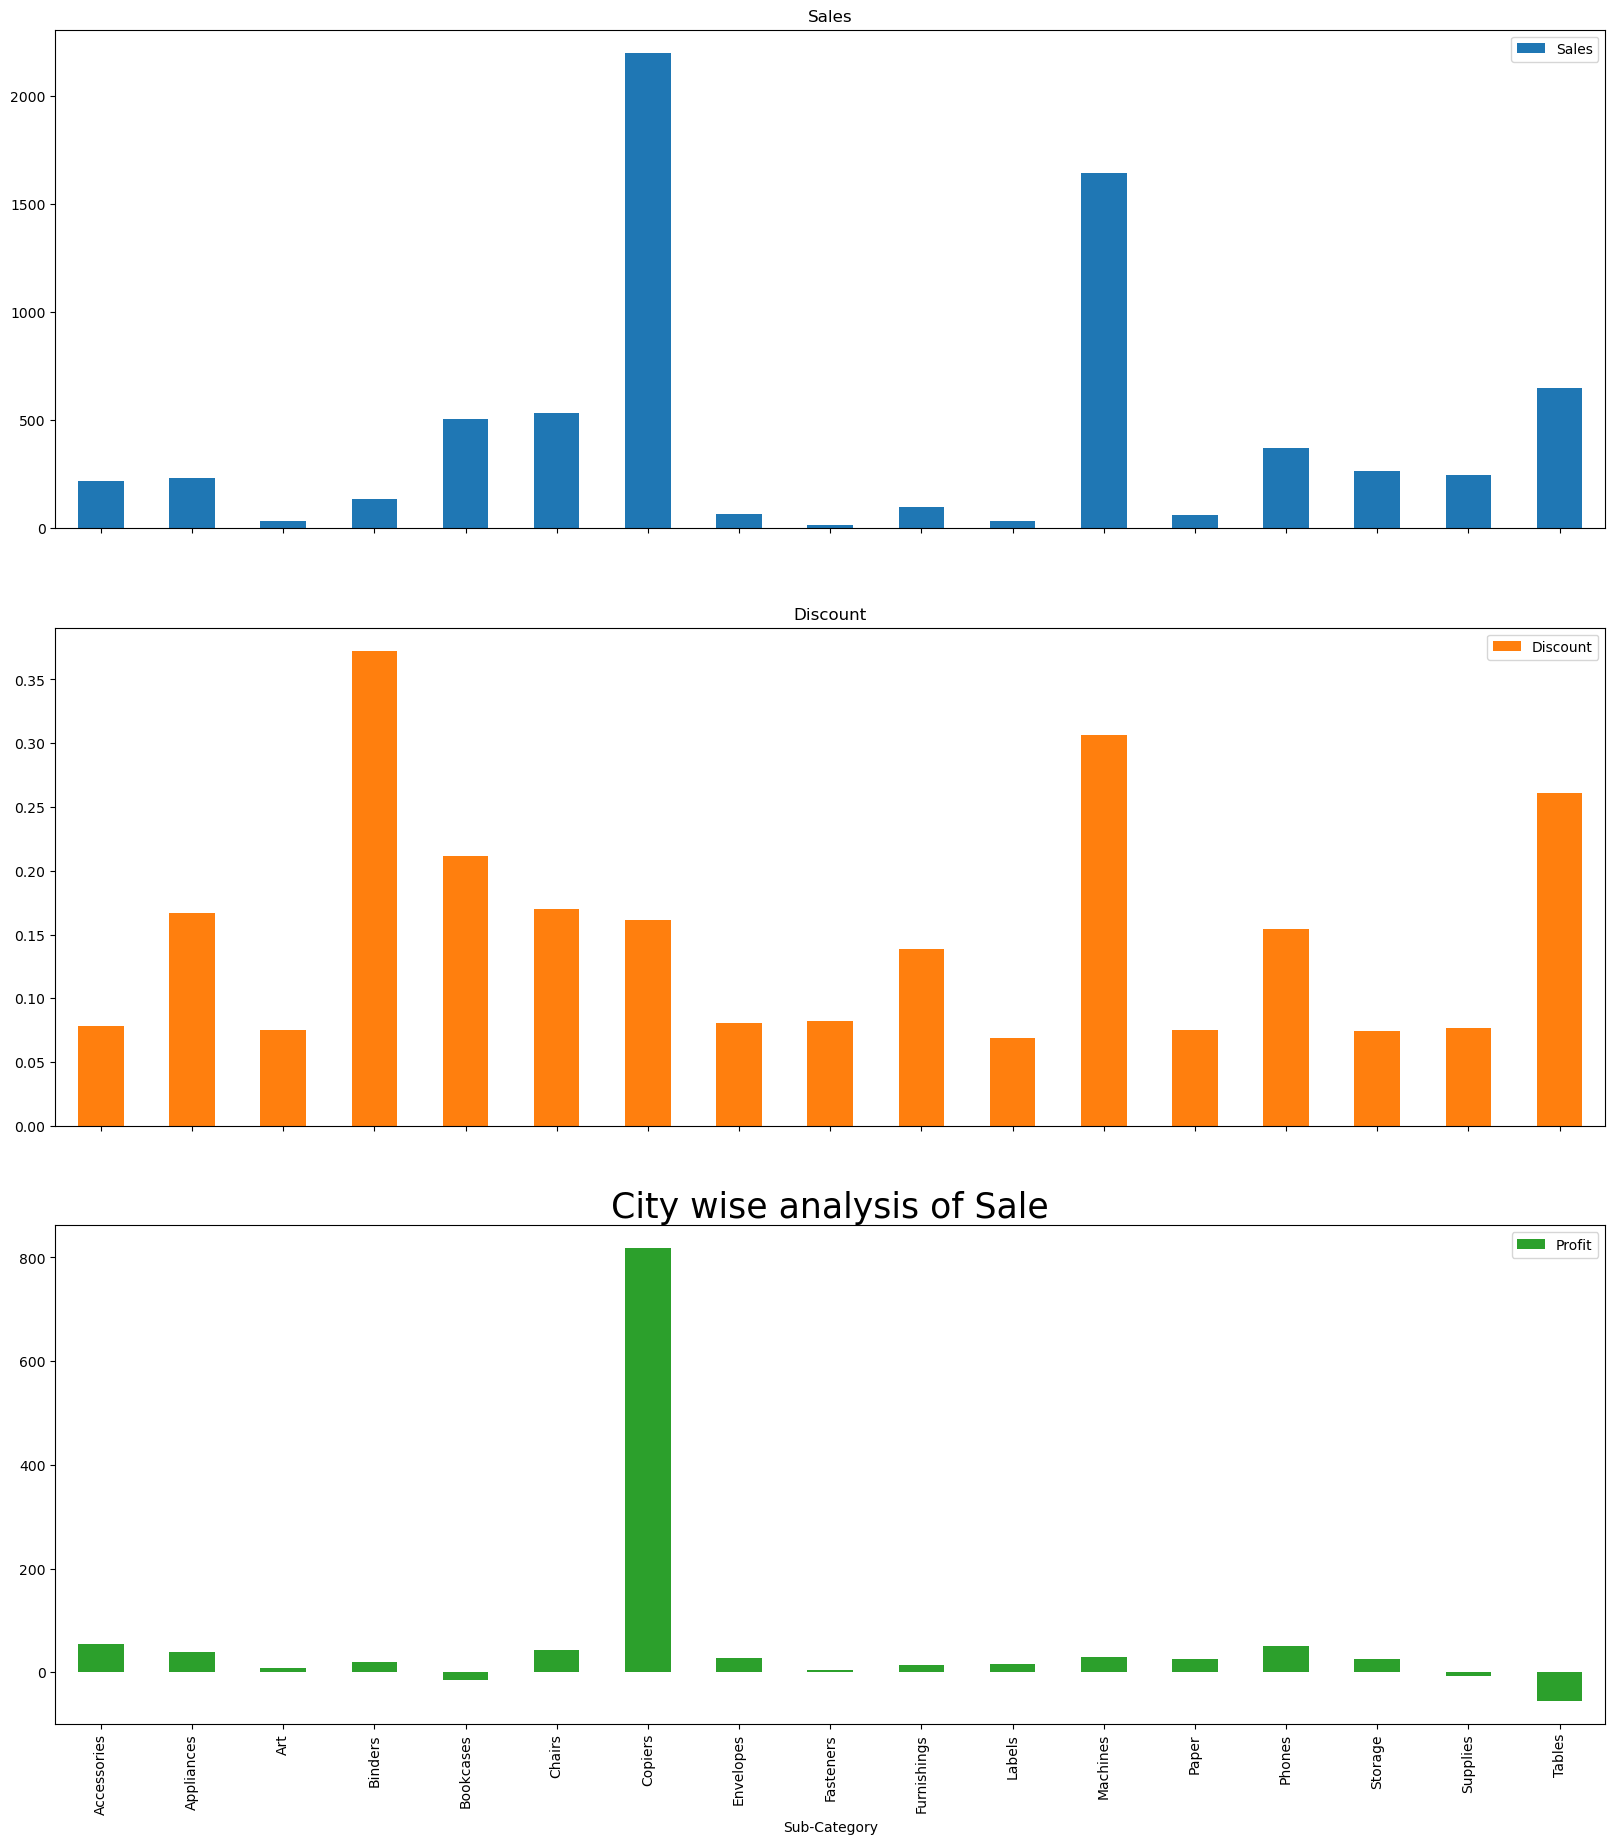

In [141]:
df_SCategory.plot(kind='bar',subplots= True,figsize=(20,22))
plt.title('City wise analysis of Sale',fontsize=25)

* Copies have High Sales and Profit
* Binders, Machines and Tables have high Discounts

<AxesSubplot:xlabel='Sub-Category'>

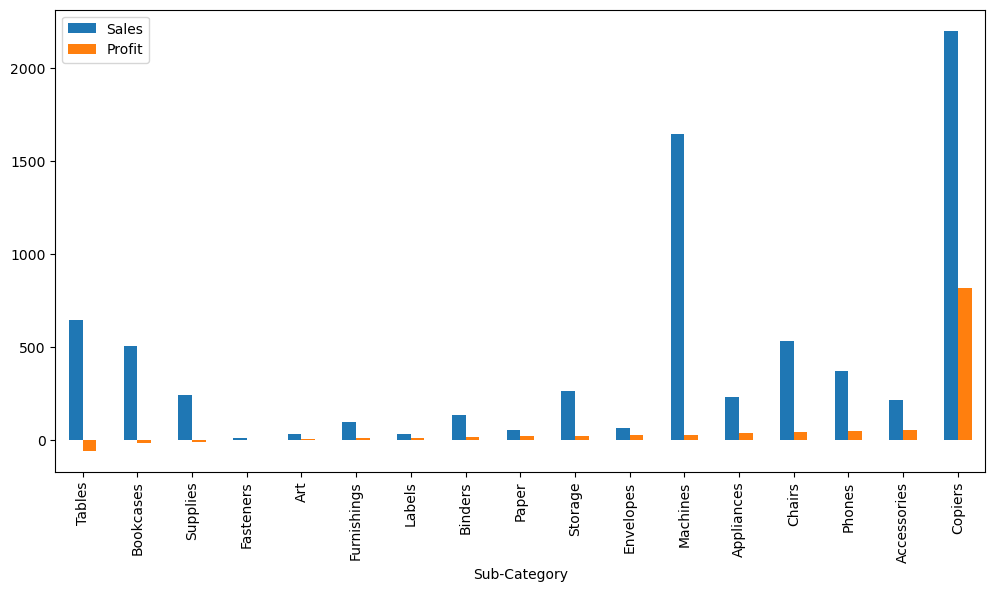

In [143]:
df_SCategory.sort_values('Profit')[['Sales','Profit']].plot(kind = 'bar',figsize=(12,6),label=['Avg Sales Price($)','Profits($)'])

* Copies have high Profits as well as Sales

In [144]:
df_Region = df.groupby(['Region'])[['Sales','Discount','Profit']].mean()
df_Region.head()

,Sales,Discount,Profit
Region,,,
Central,216.295581,0.240060,17.132634
East,239.351662,0.145516,32.299114
South,241.803645,0.147253,28.857673
West,227.985299,0.109931,34.062005


Text(0.5, 1.0, 'City wise analysis of Sale')

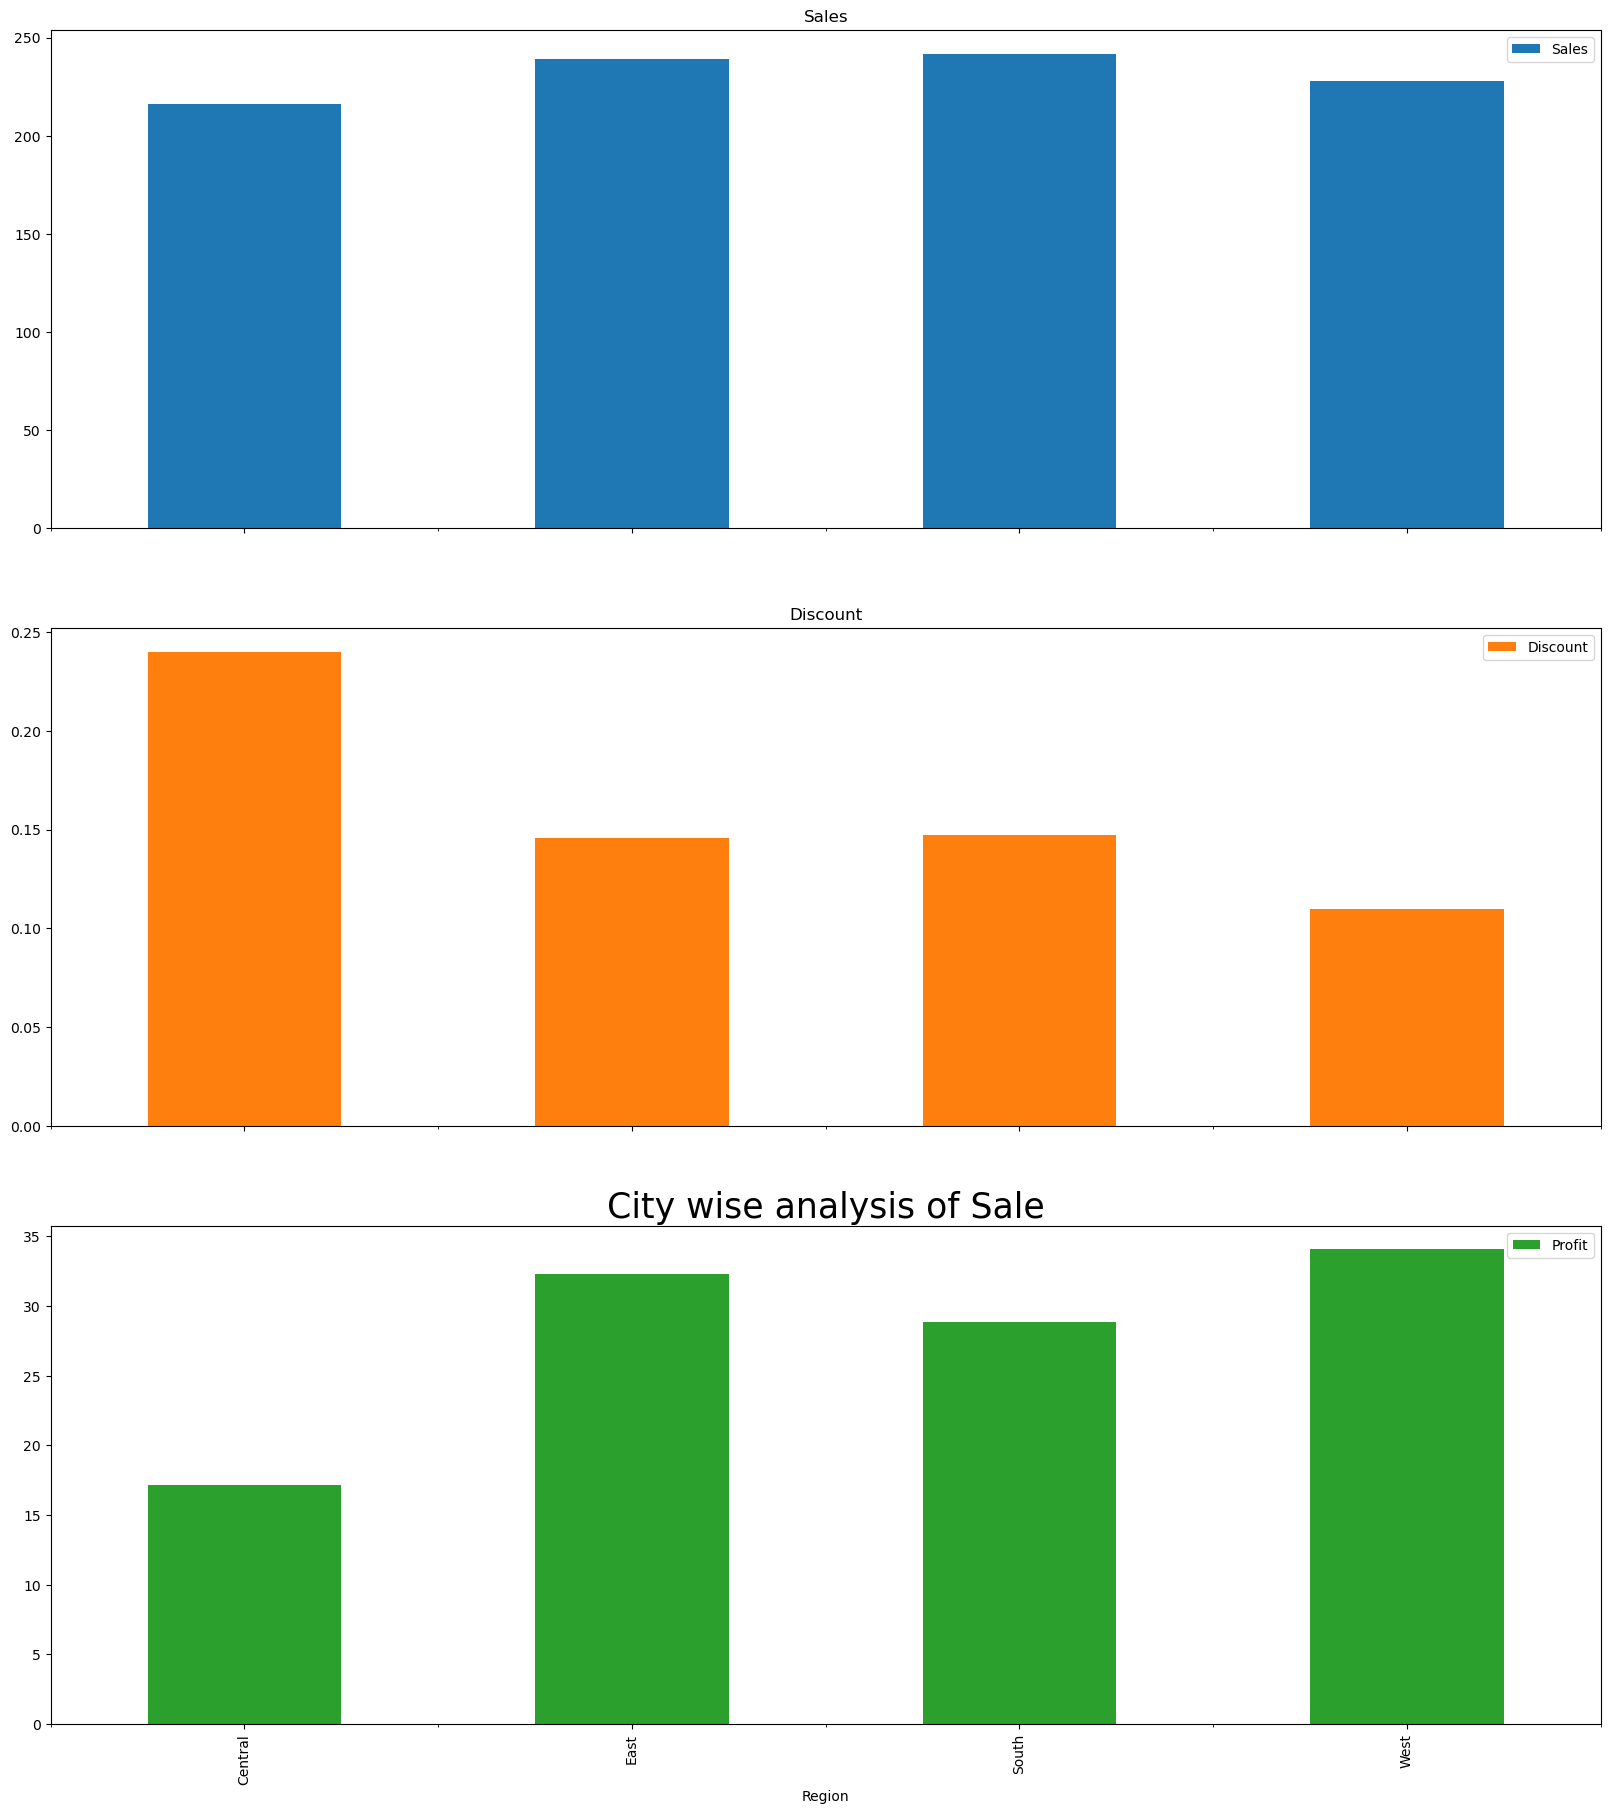

In [145]:
df_Region.plot(kind='bar',subplots= True,figsize=(20,22))
plt.title('City wise analysis of Sale',fontsize=25)

* Profit is highest in the West Region